In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.dpi'] = 150

In [2]:
mb = pd.read_csv("input/elevation_profile/mass_balance.csv", sep=";", parse_dates=["year"], index_col="year")
mb = mb.applymap(lambda x: float(x.replace(",", ".")))

In [3]:
mb.head(5)

,nb,cumul
year,,
1946-01-01,-3.729,-51.269
1947-01-01,-6.831,-58.100
1948-01-01,0.000,-58.100
1949-01-01,3.003,-55.097
1950-01-01,-4.257,-59.354


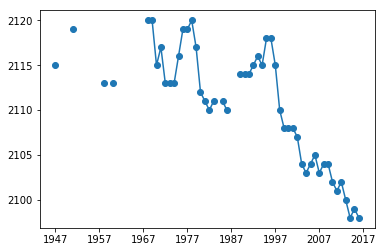

In [4]:
elev = pd.read_csv("input/elevation_profile/sydtoppen.csv", sep=";", parse_dates=["year"], index_col="year", names=["year", "elev"], skiprows=1)


#elev = elev.resample("AS").interpolate(method="quadratic")

plt.scatter(elev.index, elev["elev"])
plt.plot(elev.index, elev["elev"])


,x,y,r
65,0,5,0.760793
59,-1,5,0.753961
64,0,4,0.753178
58,-1,4,0.747678
52,-2,4,0.736974
57,-1,3,0.728583
53,-2,5,0.723463
51,-2,3,0.720589
71,1,5,0.70453
46,-3,4,0.673099


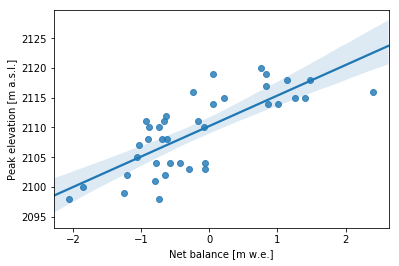

In [8]:
test = mb.join(elev)
test["diff"] = test["elev"].diff(1)

test = test.loc["1975":]

result = pd.DataFrame(columns=["x", "y", "r"])
count = 0
for x in np.arange(-10, 10):
    for y in np.arange(0, 6):
        
        rol_mb = mb.rolling(y).mean()
        test["shifted"] = test["elev"].shift(x)
        
        # Correlation between net balance and shifted altitude
        corr = rol_mb["nb"].corr(test["shifted"])
        
        # Save result
        result.loc[count, ["x", "y", "r"]] = x, y, corr
        
        # Graph
        if x == 0 and y == 5:

            joined = rol_mb.join(test["shifted"]).dropna(how="any")
        
            #plt.scatter(joined["nb"], joined["shifted"], c=joined.index, s=15)
            sns.regplot("nb", "shifted", data=joined)
            
            for i, yr in enumerate(joined.index):
                coord = tuple(joined.iloc[i, [0, 2]])
                #plt.annotate(yr.year, coord, fontsize=6, ha="center", va="center")           
        
        
            
        count += 1

plt.ylabel("Peak elevation [m a.s.l.]")
plt.xlabel("Net balance [m w.e.]")


plt.savefig("export/correlation_180510.png", dpi=300)

result.sort_values("r", ascending=False).head(10)

D:\Program\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Program\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


1960-01-01    0.139878
1961-01-01    0.139878
1962-01-01    0.139878
1963-01-01    0.139878
1964-01-01    0.139878
1965-01-01    0.139878
1966-01-01    0.139878
1967-01-01    0.139878
1968-01-01    0.659301
1969-01-01    0.690960
1970-01-01    0.712063
1971-01-01    0.696112
1972-01-01    0.736428
1973-01-01    0.755756
1974-01-01    0.735482
1975-01-01    0.643901
1976-01-01    0.690414
1977-01-01    0.707362
1978-01-01    0.746879
1979-01-01    0.703456
1980-01-01    0.620945
dtype: float64


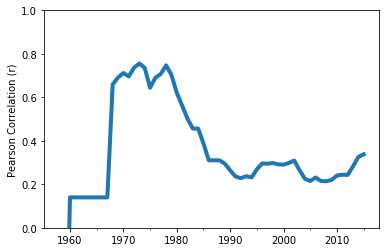

In [16]:
data = mb.join(elev)

data["rol"] = data["nb"].rolling(5).mean()


result = {}
for i in data.index:
    
    if i == data.index.max() or i == data.index.min():
        continue
    test = data.loc[:i]
    
    corr = test["rol"].corr(test["elev"])
    
    result[i] = corr

result = pd.Series(result)

print(result.loc["1960":"1980"])
result.plot(lw=4)

plt.ylabel("Pearson Correlation (r)")
plt.ylim((0, 1))

plt.savefig("export/pearson_180503.png", dpi=300)


0.09860993716672205

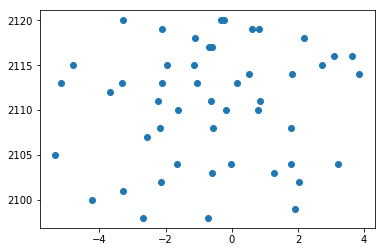

In [14]:
dat = data.dropna()
plt.scatter(dat["nb"], dat["elev"])
dat["nb"].corr(dat["elev"])